# PSI3471 - Aula de Exercícios 01

# Regressão Linear


# Exercício 1

A tabela abaixo contém dados dos medalhistas de ouro da prova masculina de atletismo na modalidade de 400 metros rasos dos últimos doze jogos olímpicos (de 1976 a 2020).  Utilizando os dados dessa tabela, vamos obter aproximações polinomiais de diferentes ordens. Em cada aproximação, vamos estimar o tempo que se espera para essa prova nos jogos olímpicos que serão realizados em Paris em 2024 e também nos jogos de 2032.

|Ano|Local|Medalhista de ouro|País|Tempo|
|:--|:--|:--|:--|:--|
|1976|Montreal|Alberto Juantorena|Cuba|44,26|
|1980|Moscou|Viktor Martin|URSS|44,60|
|1984|Los Angeles|Alonzo Babers|EUA|44,27|
|1988|Seul|Steve Lewis|EUA|43,87|
|1992|Barcelona|Quincy Watts|EUA|43,50|
|1996|Atlanta|Michael Johnson|EUA|43,49|
|2000|Sydney|Michael Johnson|EUA|43,84|
|2004|Atenas|Jeremy Wariner|EUA|44,00|
|2008|Pequim|LaShawn Merritt|EUA|43,75|
|2012|Londres|Kirani James|Granada|43,94|
|2016|Rio de Janeiro|Wayde Van Niekerk|África do Sul|43,03|
|2020|Tóquio|Steven Gardiner|Bahamas|43,85|


Iniciamos importando as bibliotecas necessárias para implementar a RL:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Em seguida, criamos os *arrays* com os dados do problema:

In [ ]:
# Dados do problema
x = np.linspace(1976, 2020, 12) - 1976
x = x.reshape(-1, 1) # Convertendo x para um array de rank 2 (vetor coluna)

d = np.array(
    [44.26, 44.60, 44.27, 43.87, 43.50, 43.49, 43.84, 44.00, 43.75, 43.94, 43.03, 43.85]
).reshape(-1, 1) # Convertendo d para um array de rank 2 (vetor coluna)

Note que descontamos o valor 1976 de `x` e, dessa forma, `x` ficará no intervalo $[0, 44]$. Como vamos obter aproximações polinomiais, é importante fazer isso para evitar que a matrix `X` de dados tenha valores muito grandes quando é considerada uma ordem do polinômio elevada, o que poderá levar a problemas numéricos.

Além disso, é interessante evitar trabalhar com *arrays* de rank 1, garantindo que os vetores criados sejam vetores linha ou coluna. No código anterior, usamos `.reshape(-1, 1)` para que sejam gerados vetores coluna, com `shape` `(N, 1)`.

Vamos armazenar na variável N, o número de pontos fornecidos para o cálculo da regressão:

In [ ]:
N = x.shape[0]

Nesse caso, como `x` é um vetor coluna, poderíamos usar `len(x)` no lugar de `x.shape[0]`. No entanto, vale lembrar que  a função `len(array)` retorna o número de linhas do `array`. Assim, para um vetor linha, a saída da função será sempre `1`, independente do número de elementos do vetor.

Tendo os vetores de dados, criamos a função para calcular a RL:

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [ ]:
def RL_reta(x, d):
    """
    Função que implementa a regressão linear univariada (reta)
    x é o vetor que contém os dados de entrada
    d é o vetor que contem o sinal desejado ou rótulo

    No problema x representa o ano e d o tempo de prova do medalhista de ouro
    """

    # N representa o número de dados para o cálculo da RL
    N = x.shape[0]

    # X é a matriz dos dados
    X = np.zeros((N, 2))

    # A primeira coluna da matrix X recebe 1's e a segunda os valores de x
    X[:, [0]] = np.ones((N, 1))
    X[:, [1]] = x

    # R é o produto das matrizes X.T e X
    #############
    # R = ... (1 linha)
    #############
    R = np.dot(X.T, X)
    # o vetor p é dado pelo produto entre a matriz X.T e o vetor d
    #############
    # p = ... (1 linha)
    #############
    p = np.dot(X.T, d)
    # Para evitar problemas numéricos, é mais adequado resolver o sistema linear usando a função np.linalg.solve
    # Complete a função, resolvendo o sistema linear para calcular wo
    # utilizando a função np.linalg.solve
    # Documentação em https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html
    #############
    # wo = ... (1 linha)
    wo = np.linalg.solve(R, p)
    # Calcule o vetor de erros e
    #############

    # Uma vez calculada a solução dos mínimos quadrados, podemos calcular o vetor de erro
    #############
    # e = ... (1 linha)
    #############
    e = d - np.dot(X, wo)

    return wo, e

Vamos calcular o resultado da aproximação de primeira ordem:

In [ ]:
# Cálculo dos coeficientes da regressão e do vetor de erros
wo, e = RL_reta(x, d)

Usando os coeficientes da regressão, vamos fazer uma previsão do tempo para os anos de 2024 e 2032. Inicialmente vamos criar um vetor com os dados de entrada:

In [ ]:
# Dados para previsão
xn = np.array([2024 - 1976.0, 2032 - 1976.0]).reshape(-1, 1)

É importante garantir que o vetor gerado é do tipo `float`. Uma forma de fazer isso é incluir o `.0` nos elementos do vetor. Caso contrário, ele será considerado como `int` e pode causar problemas na solução.

Para verificar o tipo dos dados de um *array* do NumPy, podemos usar o atributo `.dtype`:

In [ ]:
xn.dtype

dtype('float64')

Com os dados de entrada e os coeficientes da regressão, podemos calcular os dados de saída:

In [ ]:
dn = wo[0] + wo[1] * xn
dn

array([[43.41893939],
       [43.28117716]])

Por fim, vamos plotar um gráfico mostrando a reta obtida pelos coeficientes da regressão e os dados de treinamento:

A média do módulo do erro no treinamento foi 0.26


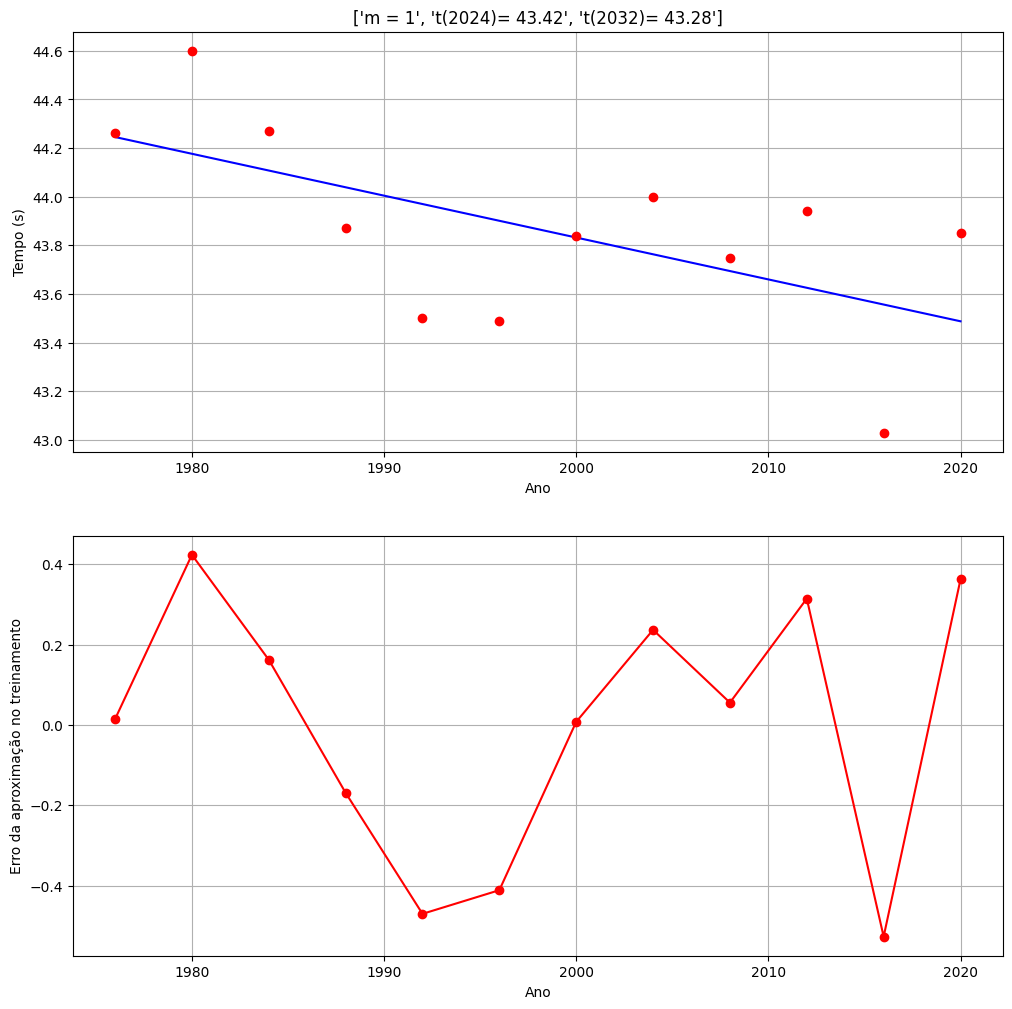

In [ ]:
# A função linspace já gera dados do tipo float
xt = np.linspace(1976 - 1976, 2020 - 1976, 500).reshape(-1, 1)
dt = wo[0] + wo[1] * xt

plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(xt + 1976, dt, "b")
plt.plot(x + 1976, d, "or")
plt.grid()
plt.title(
    [
        "m = 1",
        "t(2024)= " + str(round(dn[0, 0], 2)),
        "t(2032)= " + str(round(dn[1, 0], 2)),
    ]
)
plt.xlabel("Ano")
plt.ylabel("Tempo (s)")

plt.subplot(2, 1, 2)
plt.plot(x + 1976, e, "-or")
plt.grid()
plt.xlabel("Ano")
plt.ylabel("Erro da aproximação no treinamento")

# Média do módulo do erro do treinamento
MErro1 = np.sum(np.abs(e)) / d.shape[0]
print("A média do módulo do erro no treinamento foi " + str(round(MErro1, 2)))

Agora, vamos utilizar polinômios de ordem mais elevada para fazer a regressão. Vamos iniciar pela implementação da função para calcular os coeficientes de uma regressão polinomial:

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [ ]:
def RL_polinomial(x, d, m):
    """
    Função que implementa a regressão linear polinomial

    x é o vetor que contém os dados de entrada
    d é o vetor que contem o sinal desejado ou rótulo
    No problema x representa o ano e d o tempo da prova
    m é a ordem do polinômio da aproximação

    A função retorna um vetor coluna com m + 1 elementos (para ordem 2, retorna 3 elementos)
    """

    # N representa o número de dados para o cálculo da RL
    N = d.shape[0]

    # X é a matriz dos dados, levando em conta a ordem da aproximação polinomial
    X = np.zeros((N, m + 1))

    # Monte a matriz X com m + 1 colunas, representando os dados de entrada da regressão linear
    #############
    X[:, [0]] = np.ones((N, 1))
    for i in range(1, m + 1):
        X[:, [i]] = x**i


    wo = np.linalg.solve(X.T @ X, X.T @ d)
    e = d - np.dot(X, wo)


    return wo, e

Também vamos precisar de uma função para calcular a saída da regressão para um determinado valor de entrada:

In [ ]:
# Função que testa a aproximação polinomial. No problema, vamos usar essa função para prever
# o valor do tempo em 2024 e 2032
def teste_pol(wo, xn):
    m = wo.shape[0]
    N = xn.shape[0]
    dn = np.zeros((N, 1))
    for i in range(m):
        dn = dn + wo[i] * xn**i
    return dn



Além da reta, obtida acima, vamos considerar mais 8 aproximações polinomiais (reta, parábola, ..., polinômio de grau 9):

Text(0, 0.5, 'Módulo do Erro da aproximação no treinamento')

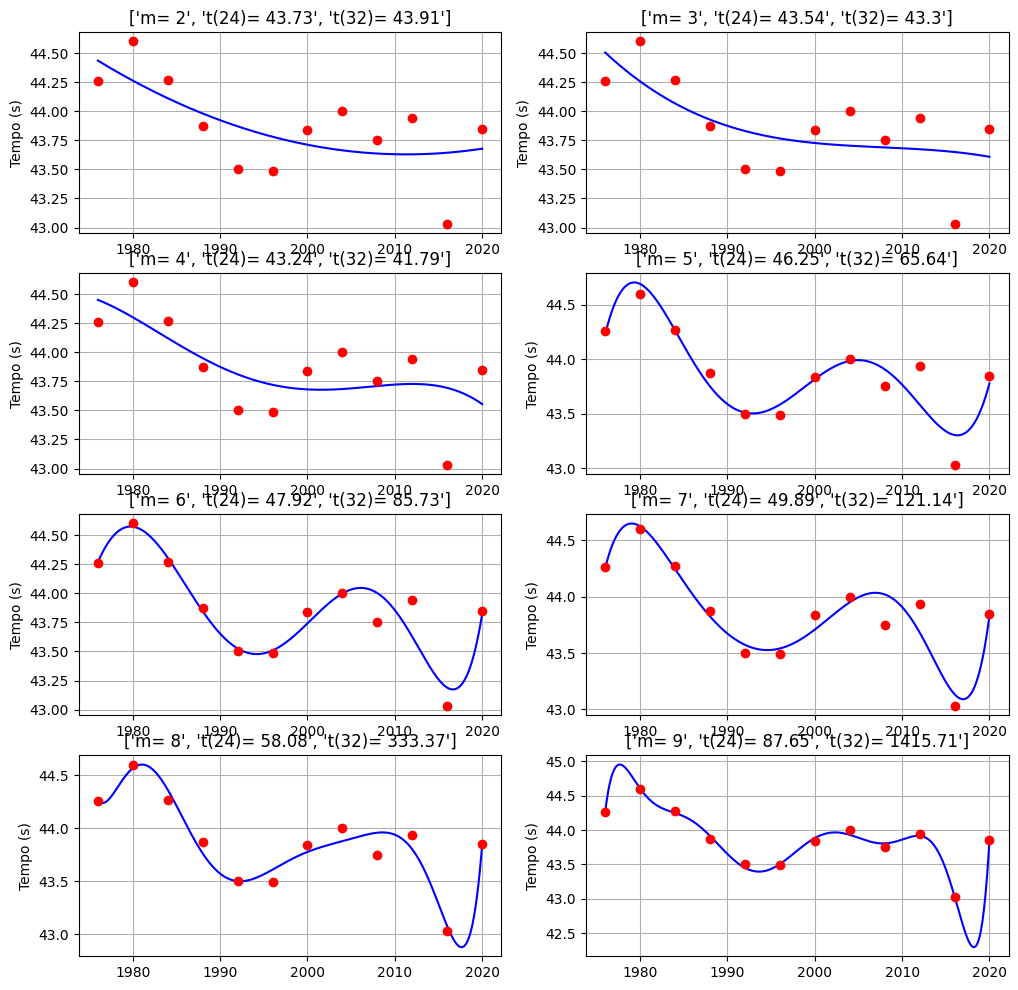

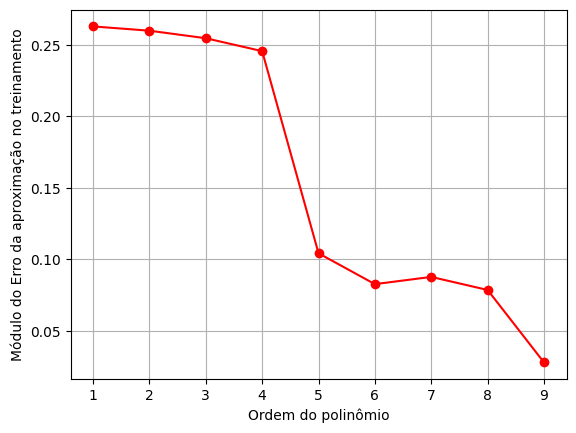

In [ ]:
Gp = 10
ordem = range(2, Gp)
MErro = np.zeros((Gp - 1, 1))
MErro[0] = MErro1

# Dados para previsão
xn = np.array([2024 - 1976.0, 2032 - 1976.0]).reshape(-1, 1)
# Dados para gerar gráfico da aproximação
xt = np.linspace(1976 - 1976, 2020 - 1976, 500).reshape(-1, 1)

plt.figure(figsize=(12, 12))
for m in ordem:
    wo, e = RL_polinomial(x, d, m)
    dn = teste_pol(wo, xn)
    dt = teste_pol(wo, xt)

    MErro[m - 1] = np.sum(np.abs(e)) / d.shape[0]

    plt.subplot(4, 2, m - 1)
    plt.plot(xt + 1976, dt, "b")
    plt.plot(x + 1976, d, "or")
    plt.grid()
    plt.title(["m= " + str(m), "t(24)= " + str(round(dn[0, 0],2)), "t(32)= " + str(round(dn[1, 0],2))])
    plt.ylabel("Tempo (s)")

# Vamos gerar um gráfico do erro de aproximação no treinamento em função da ordem do polinômio
plt.figure()
xo = range(1, Gp)
plt.plot(xo, MErro, "-or")
plt.grid()
plt.xlabel("Ordem do polinômio")
plt.ylabel("Módulo do Erro da aproximação no treinamento")

# Conclusões

1. Idealmente, seria bom reservar uma parte dos dados para análise do modelo. No entanto, resolvemos usar todos os dados já que havia apenas 12 amostras e sabíamos a faixa de valores esperada. A partir da ordem 4, a previsão está fora do que se espera. Em particular para ordem 9, observamos que a curva se ajusta a todos os pontos, mas a previsão está totalmente fora do intervalo que esperamos. Claramente, ocorreu *overfitting*. Ou seja, o modelo se ajusta quase que perfeitamente aos dados de treinamento, mas não consegue gerar previsões adequadas para dados que não foram utilizados para treiná-lo.

2. Quando buscamos o polinômio de ordem maior ou igual a 2, apesar de estarmos lidando com dados do tipo $(x_n, d_n)$, podemos dizer que estamos fazendo uma regressão linear multivariada. Considerando essa interpretação, estamos usando
dados do tipo
$$(x_n, x_n^2, x_n^3, \ldots, x_n^m, d_n)$$
para a aproximação com polinômio de ordem $m$.

# Exercício 2

A falta ou excesso de chuva sempre traz preocupação. No primeiro caso, pode haver problemas no abastecimento de água como ocorreu na crise hídrica do Brasil em meados entre 2014 e 2015. No segundo, pode haver alagamentos, destruição e eventualmente mortes nas áreas afetadas, como ocorreu no litoral norte de São Paulo em fevereiro de 2023.

Vamos usar a regressão linear para encontrar uma aproximação para os dados médios de precipitação  na cidade de São Paulo.
Para isso, considere os dados da tabela abaixo obtidos em  http://www.climatempo.com.br/ . As médias climatológicas são valores calculados a partir de um série de dados de 30 anos observados. Para simplificar, os dias do ano são numerados começando em 15 de janeiro. Suponha que os dados de cada mês não estão disponíveis e se deseja
obter o valor médio em uma certa data do ano que não está na tabela.

|Data|Dia/número|Precipitação (mm)|
|:--|:-:|:-:|
|15 de janeiro|0|237|
|15 de março|59|161|
|15 de maio|120|71|
|15 de julho|181|44|
|15 de setembro|243|71|
|15 de novembro|304|146|

Para essa aproximação, faz sentido usar uma função periódica. Considere
a seguinte aproximação
$$d\approx\alpha_0+\alpha_1\cos\left(\frac{2\pi x}{365}\right)+\alpha_2\;{\rm sen}\left(\frac{2\pi x}{365}\right).$$

Em um mesmo gráfico, plote os dados e a aproximação. Apresente também um gráfico dos erros. Estime o valor médio esperado para o dia 15 de agosto que corresponde ao dia número 227 do ano e compare com o valor real médio que é de 40mm.

Iniciamos criando os *arrays* com os dados do problema:

In [ ]:
# Dados do problema
x = np.array([0.0, 59.0, 120.0, 181.0, 243.0, 304.0]).reshape(-1, 1)
d = np.array([237.0, 161.0, 71.0, 44.0, 71.0, 146.0]).reshape(-1, 1)
N = x.shape[0]

Em seguida, modificamos a função para calcular a RL considerando o modelo fornecido:

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

In [ ]:
def RL_sencos(x, d):
    """
    Função que implementa a regressão linear polinomial
    x é o vetor que contém os dados de entrada
    d é o vetor que contem o sinal desejado ou rótulo
    No problema x representa o dia do ano e d a precipitação média
    """
    # Escreva o código para calcular o vetor de coeficientes wo e o
    # vetor de erros e
    #############
    # Insira o código aqui
    N = d.shape[0]
    omega = 2 * np.pi / 365
    X = np.zeros((N, 3))

    X[:, [0]] = np.ones((N, 1))
    X[:, [1]] = np.cos(omega * x)
    X[:, [2]] = np.sin(omega * x)

    wo = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, d))
    e = d - np.dot(X, wo)
    #############

    return wo, e

Com a função implementada, calculamos os coeficientes da regressão:

In [ ]:
wo, e = RL_sencos(x, d)

Com os coeficientes, calculamos a previsão para o dia 227:

In [ ]:
# Dados para previsão
xn = 227.0
aux = 2 * np.pi / 365
dn = wo[0] + wo[1] * np.cos(aux * xn) + wo[2] * np.sin(aux * xn)
print(xn)
print(dn)

227.0
[43.87741897]


Por fim, vamos gerar gráficos mostrando a curva obtida pela regressão, os pontos utilizados para obter os coeficientes e o valor dos erros em relação à cada ponto:

<div class="alert alert-block alert-success">
Complete o código a seguir:
</div>

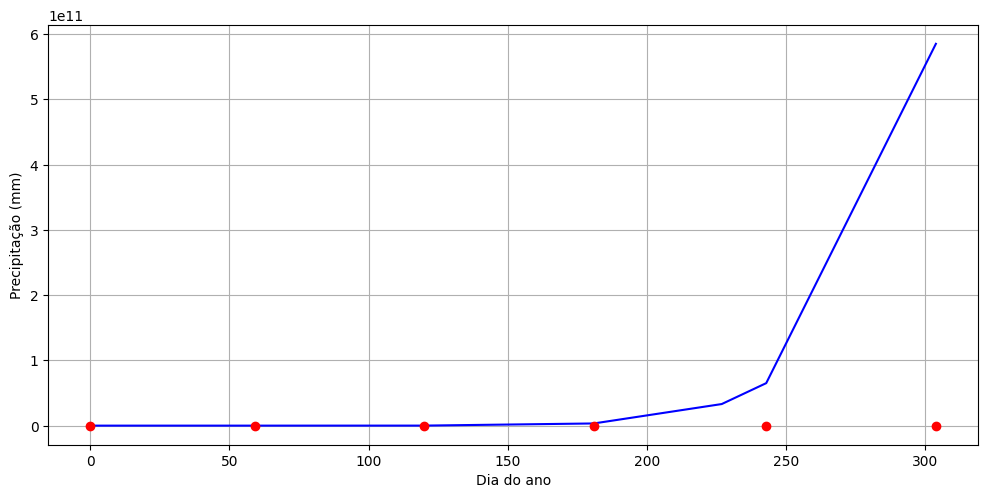

In [ ]:
# Plote uma figura com 2 gráficos:
# 1) Um gráfico com a aproximação obtida pela regresão ao longo
# dos dias dos ano. Inclua os pontos usados para a obtenção dos
# coeficientes da regressão no mesmo gráfico
# 2) Um gráfico com o erro da aproximação obtida com a regressão
# para cada ponto usado para a obtenção dos coeficientes wo

#############
xt = np.array([0.0, 59.0, 120.0, 181.0, 227.0, 243.0, 304.0]).reshape(-1, 1)
dt = teste_pol(wo, xt)

plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(xt, dt, "b")
plt.plot(x, d, "or")
plt.xlabel("Dia do ano")
plt.ylabel("Precipitação (mm)")
plt.grid()




#############
